***
<font size="6"><center><b> HD-CapsNet: A Hierarchical Deep Capsule Network for Image Classification </b></center></font>
***

**Changing Model Architecture**
- **(Mod-3.1)** 32D>16D>8D (Coarse>Medium>FINE) use skip connections between Secondary Capsules $Concatenate([P_{caps}, S_{coarse}])$ > input for $S_{medium}$ and $Concatenate([P_{caps}, S_{medium}])$ > input for $S_{fine}$
- With $L_{Cons}$

# Files and Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras import backend as K

import tensorflow_docs as tfdocs
import tensorflow_docs.plots

# Supporting Libraries:
    #Mathplot lib for ploting graphs
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
    # numpy and pandas
import numpy as np
import pandas as pd
    #system
import os
import sys
import csv
    #import other libraries
import math
import random
from datetime import datetime
from treelib import Tree
    # ML model, Dataset and evalution metrics
sys.path.append('../../') ### adding system parth for src folder
from src import datasets # load datasets
from src import MixUp # load datasets
from src import MixUp_add_loss # load datasets
from src import metrics # load hierarchcial metrics
from src import sysenv # load hierarchcial metrics
from src import models # load machine learning models

    ## Tensorflow_docs
import tensorflow_docs as tfdocs
import tensorflow_docs.plots

    # Auto reload local libraries if updated
%load_ext autoreload
%autoreload 2

# System information & GPU growth

In [2]:
systeminfo = sysenv.systeminfo()
print(systeminfo)


• Computer Name = 30BFPC1AXW95
• Working Directory = C:\Users\knoor\OneDrive - Deakin University\Deep Learning with Python\Google_Drive\Projects\Deep Learning\HD-CapsNet\Training_and_Analysis\7_Marin_Tree
• Python Version = 3.8.12 (default, Oct 12 2021, 03:01:40) [MSC v.1916 64 bit (AMD64)]
• TensorFlow Version = 2.8.0
• Keras Version = 2.8.0
• Current Environment = Anaconda Environment Name : py38tf


In [3]:
gpus = "0,1,2,3,4,5,6,7" ## Selecting Available gpus (Multi-GPUS)
gpus = "1" ## Selecting Available gpus (Single GPU)
gpugrowth = sysenv.gpugrowth(gpus = gpus) ## Limiting GPUS from OS environment
gpugrowth.memory_growth() #GPU memory growth

Following GPUS are selected =  0
Done: GPU PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
1 Physical GPUs, 1 Logical GPUs


# Parameters

In [4]:
train_params = {"n_epochs" : 100,
                "batch_size": 64,
                "lr": 0.001, # Initial learning rate
                "lr_decay": 0.95, # Learning rate decay
                "decay_exe": 9, #learning rate decay execution epoch after
               }
model_params = {"optimizer": tf.keras.optimizers.Adam(train_params['lr']),
                "loss_function": models.MarginLoss(),
               }

# log directory

In [5]:
directory = sysenv.log_dir('7_Marine_Tree/HD_CapsNet/Mod_3_1')

# Import Dataset : Marine Tree Dataset

In [6]:
dataset = datasets.get_Marine_dataset(output_level='level_depth_3', # 'level_depth_3', 'level_depth_4', 'level_depth_5
#                                       dataset_path ='D:\Datasets\Marine_tree', ## Path to the dataset directory
                                      dataset_path ='/home/knoor/Downloads/RunningOnServer/H-CapsNet_Revision/Dataset/Marine_tree', ## Path to the dataset directory
                                      image_size=(64,64),
                                      batch_size=train_params['batch_size'],
                                      subtype='Combined',
                                      data_normalizing ='normalize',
                                      class_encoding = 'One_Hot_Encoder',
                                      data_augmantation = 'mixup'
                                     )

Example =  0


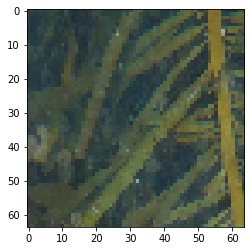

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {7: 0.17750219, 33: 0.82249784}
Example =  1


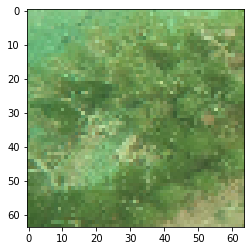

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {0: 0.00010406971, 1: 0.99989593}
Example =  2


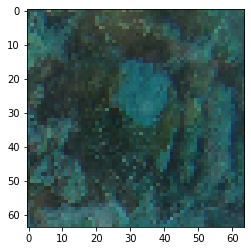

Coarse = {0: 0.5469125, 1: 0.4530875}
Medium = {7: 0.5469125, 9: 0.4530875}
Fine   = {0: 0.5469125, 37: 0.4530875}
Example =  3


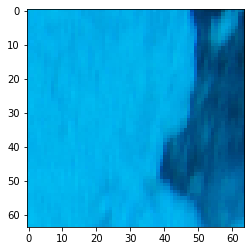

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {7: 0.99461263, 33: 0.005387366}
Example =  4


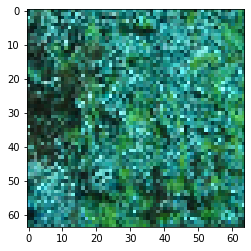

Coarse = {0: 1.0}
Medium = {7: 0.9977084, 8: 0.0022916198}
Fine   = {0: 0.9977084, 23: 0.0022916198}
Example =  5


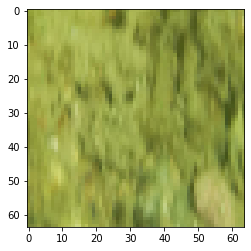

Coarse = {1: 1.0}
Medium = {9: 1.0}
Fine   = {15: 1.0}
Example =  6


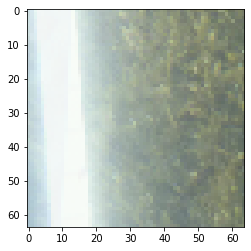

Coarse = {0: 0.94742554, 1: 0.052574456}
Medium = {7: 0.94742554, 9: 0.052574456}
Fine   = {33: 0.94742554, 37: 0.052574456}
Example =  7


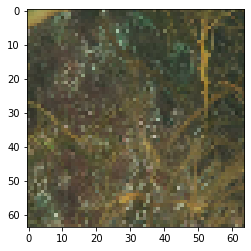

Coarse = {0: 0.99922436, 1: 0.00077563274}
Medium = {7: 0.99922436, 9: 0.00077563274}
Fine   = {15: 0.00077563274, 33: 0.99922436}
Example =  8


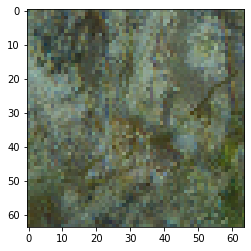

Coarse = {0: 0.43805715, 1: 0.5619428}
Medium = {7: 0.43805715, 9: 0.5619428}
Fine   = {33: 0.43805715, 37: 0.5619428}
Example =  9


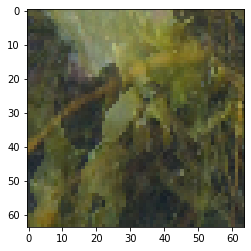

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0}
Example =  10


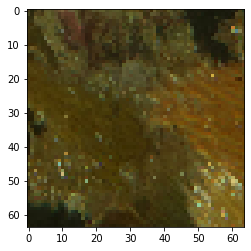

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {33: 1.0, 35: 2.1765253e-08}
Example =  11


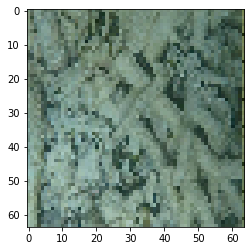

Coarse = {0: 0.06319618, 1: 0.9368038}
Medium = {7: 0.06319618, 9: 0.9368038}
Fine   = {0: 0.06319618, 37: 0.9368038}
Example =  12


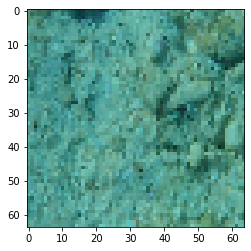

Coarse = {0: 0.052660465, 1: 0.94733953}
Medium = {0: 0.052660465, 9: 0.94733953}
Fine   = {15: 0.94733953, 31: 0.052660465}
Example =  13


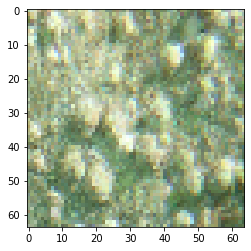

Coarse = {0: 1.0}
Medium = {4: 0.9999994, 7: 6.204417e-07}
Fine   = {18: 0.9999994, 33: 6.204417e-07}
Example =  14


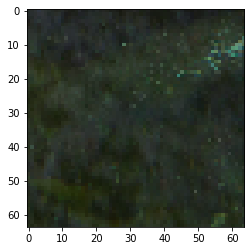

Coarse = {0: 1.0}
Medium = {7: 1.0}
Fine   = {7: 0.35894066, 33: 0.64105934}
Example =  15


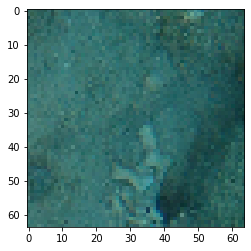

Coarse = {1: 1.0}
Medium = {9: 1.0}
Fine   = {15: 1.0}


In [7]:
for x,y in dataset.train_dataset.take(1):
    for i in range(len(x)):
        print('Example = ', i)
        plt.imshow(x[i])
        plt.show()
        print('Coarse =', {k:v for k,v in enumerate(y[0][i].numpy()) if v != 0}) # coarse lables
        print('Medium =', {k:v for k,v in enumerate(y[1][i].numpy()) if v != 0}) # medium lables
        print('Fine   =', {k:v for k,v in enumerate(y[2][i].numpy()) if v != 0}) # fine lables

In [8]:
for x,y in dataset.train_dataset.take(1):
    image_shape = x.shape[1:]
    coarse_label_shape = y[0].shape[1:]
    medium_label_shape = y[1].shape[1:]
    fine_label_shape = y[2].shape[1:]

## Learning Rate Decay Scheduler

In [9]:
def scheduler(epoch):
    learning_rate_init = train_params["lr"]
    
    if epoch > train_params["decay_exe"]:
        learning_rate_init = train_params["lr"] * (train_params["lr_decay"] ** (epoch-9))
        
    tf.summary.scalar('learning rate', data=learning_rate_init, step=epoch)
        
    return learning_rate_init

# Model Architecture

## Loss Function

In [10]:
coarse_class, medium_class, fine_class = dataset.num_classes

## For Dynamic LossWeights
initial_lw = models.initial_lw({"coarse": coarse_class,
                                 "medium": medium_class,
                                 "fine": fine_class})

lossweight = {'coarse_lw' : K.variable(value = initial_lw['coarse'], dtype="float32", name="coarse_lw"),
             'medium_lw' : K.variable(value = initial_lw['medium'], dtype="float32", name="medium_lw"),
             'fine_lw' : K.variable(value = initial_lw['fine'], dtype="float32", name="fine_lw"),
              'decoder_lw' : 0.0
             }

In [11]:
Matrix_coarse_to_medium_OneHot = dataset.Matrix_coarse_to_medium_OneHot
Matrix_medium_to_fine_OneHot = dataset.Matrix_medium_to_fine_OneHot

In [12]:
def margin_loss(y_true, y_proba):
    
    present_error_raw = tf.square(tf.maximum(0., 0.9 - y_proba), name="present_error_raw")
    absent_error_raw = tf.square(tf.maximum(0., y_proba - 0.1), name="absent_error_raw")
    L = tf.add(y_true * present_error_raw, 0.5 * (1.0 - y_true) * absent_error_raw,name="L")
    total_marginloss = tf.reduce_sum(L, axis=1, name="margin_loss")

    return total_marginloss


def consistency_check(y_pred_ancestor,y_pred_current,lookup_matrix,num_class_current):
    pred_max_ancestor = tf.argmax(y_pred_ancestor,axis=1)
    pred_max_current = tf.argmax(y_pred_current,axis=1)
    
    consistant_check = tf.gather(lookup_matrix, indices=pred_max_ancestor)*tf.one_hot(pred_max_current,num_class_current)
    
    return tf.reduce_sum(consistant_check,1)

def get_consistency(y_true_ancestor, y_pred, lookup_matrix):
    '''
    Get consistency based on 2 levels
    Provide ture levels for the level above, predictions for the current level and a look up metrix
    '''
    y_prob = tf.math.divide(y_pred,tf.reshape(tf.reduce_sum(y_pred,-1),(-1,1),name='reshape'),name='Probability')
    
    index_for_predictions = tf.cast(tf.math.argmax(y_true_ancestor,axis=1),dtype= 'int32')
    consistent_fine = tf.gather(lookup_matrix, indices=index_for_predictions) * y_prob
    Consistency_sum_array = tf.reduce_sum(consistent_fine, axis =1)
    
    return tf.abs(1-Consistency_sum_array)

def CustomLoss(y_true_c, y_true_m, y_true_f, y_pred_c, y_pred_m, y_pred_f, LW_C, LW_M, LW_F,
               number_of_classes_m, number_of_classes_f, C_Weight=0.2):
    
    con_m = consistency_check(y_pred_c,y_pred_m,Matrix_coarse_to_medium_OneHot,num_class_current=number_of_classes_m)
    con_m_not = tf.abs(con_m-1)
    
    con_f = consistency_check(y_pred_m,y_pred_f,Matrix_medium_to_fine_OneHot,num_class_current=number_of_classes_f)
    con_f_not = tf.abs(con_f-1)
    
    con_sum_m = get_consistency(y_true_c,y_pred_m,Matrix_coarse_to_medium_OneHot)
    con_sum_f = get_consistency(y_true_m,y_pred_f,Matrix_medium_to_fine_OneHot)
    
    medium_lvl_cosistency = con_sum_m * con_m_not
    fine_lvl_cosistency = con_sum_f * con_f_not    
   
    ML_c = margin_loss(y_true_c, y_pred_c)*LW_C
    ML_m = LW_M*((1-C_Weight)*(margin_loss(y_true_m, y_pred_m))+C_Weight*(medium_lvl_cosistency))
    ML_f = LW_F*((1-C_Weight)*(margin_loss(y_true_f, y_pred_f))+C_Weight*(fine_lvl_cosistency))
    
    batch_loss = ML_c + ML_m+ ML_f

    return tf.reduce_mean(batch_loss)

## Architecture

In [13]:
def get_compiled_model():
    
    ## Calling the HD-CapsNet Model
    model = models.HD_CapsNet_Mod_3_3(input_shape     = image_shape, 
                                      input_shape_yc  = coarse_label_shape,
                                      input_shape_ym  = medium_label_shape,
                                      input_shape_yf  = fine_label_shape, 
                                      no_coarse_class = coarse_class, 
                                      no_medium_class = medium_class, 
                                      no_fine_class   = fine_class,
                                      PCap_n_dims     = 8, 
                                      SCap_f_dims     = 8, 
                                      SCap_m_dims     = 16, 
                                      SCap_c_dims     = 32)
    
    ## Saving Model Architecture
    keras.utils.plot_model(model, to_file = directory+"/Architecture.png", show_shapes=True)
    
    ## Add Loss for Model
    model.add_loss(CustomLoss(y_true_c            = model.inputs[1], 
                              y_true_m            = model.inputs[2], 
                              y_true_f            = model.inputs[3], 
                              y_pred_c            = model.output[0], 
                              y_pred_m            = model.output[1], 
                              y_pred_f            = model.output[2], 
                              LW_C                = lossweight['coarse_lw'], 
                              LW_M                = lossweight['medium_lw'], 
                              LW_F                = lossweight['fine_lw'],
                              number_of_classes_m = medium_class, 
                              number_of_classes_f = fine_class, 
                              C_Weight            =0.2)
                  )
    
    ## Compile Model
    model.compile(optimizer='adam',                  
                  metrics={'prediction_fine': 'accuracy',
                           'prediction_medium': 'accuracy',
                           'prediction_coarse': 'accuracy'}
                 )
    return model

## Compile Model

In [14]:
model = get_compiled_model()

In [15]:
model.summary()
# keras.utils.plot_model(model, to_file = directory+"/Architecture.png", show_shapes=True)

Model: "HD-CapsNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_Image (InputLayer)       [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 block1_conv1 (Conv2D)          (None, 64, 64, 64)   1792        ['Input_Image[0][0]']            
                                                                                                  
 batch_normalization (BatchNorm  (None, 64, 64, 64)  256         ['block1_conv1[0][0]']           
 alization)                                                                                       
                                                                                                  
 block1_conv2 (Conv2D)          (None, 64, 64, 64)   36928       ['batch_normalization[0]

                                                                                                  
 prediction_medium (LengthLayer  (None, 10)          0           ['s_caps_medium[0][0]']          
 )                                                                                                
                                                                                                  
 prediction_fine (LengthLayer)  (None, 38)           0           ['s_caps_fine[0][0]']            
                                                                                                  
 tf.math.argmax_4 (TFOpLambda)  (None,)              0           ['input_yc[0][0]']               
                                                                                                  
 tf.math.reduce_sum_2 (TFOpLamb  (None,)             0           ['prediction_medium[0][0]']      
 da)                                                                                              
          

 )                                                                                                
                                                                                                  
 tf.math.square_2 (TFOpLambda)  (None, 10)           0           ['tf.math.maximum_2[0][0]']      
                                                                                                  
 tf.math.multiply_11 (TFOpLambd  (None, 10)          0           ['tf.math.subtract_9[0][0]']     
 a)                                                                                               
                                                                                                  
 tf.math.square_3 (TFOpLambda)  (None, 10)           0           ['tf.math.maximum_3[0][0]']      
                                                                                                  
 tf.math.reduce_sum_3 (TFOpLamb  (None,)             0           ['tf.math.multiply_2[0][0]']     
 da)      

 )                                                                                                
                                                                                                  
 tf.math.multiply_6 (TFOpLambda  (None, 2)           0           ['input_yc[0][0]',               
 )                                                                'tf.math.square[0][0]']         
                                                                                                  
 tf.math.multiply_8 (TFOpLambda  (None, 2)           0           ['tf.math.multiply_7[0][0]',     
 )                                                                'tf.math.square_1[0][0]']       
                                                                                                  
 tf.math.reduce_sum_7 (TFOpLamb  (None,)             0           ['tf.math.add_1[0][0]']          
 da)                                                                                              
          

## Training Pipeline Alignment

In [16]:
#### Matching the pipeling with model inputs
def pipeline_multi_input_output(image, label):
    label_0 = label[0]
    label_1 = label[1]
    label_2 = label[2]
    return (image, label_0, label_1, label_2), (label_0, label_1, label_2)

training_dataset_match = dataset.train_dataset.map(pipeline_multi_input_output) ## Mixup dataset
val_dataset_match = dataset.val_dataset.map(pipeline_multi_input_output) ## Val Dataset

## Callback

In [17]:
tb = keras.callbacks.TensorBoard(directory+'/tb_logs'+ datetime.now().strftime("%Y%m%d-%H%M%S"))
log = keras.callbacks.CSVLogger(directory+'/log.csv', append=True)

checkpoint = keras.callbacks.ModelCheckpoint(directory+'/epoch-best.h5',
                                             monitor='val_prediction_fine_accuracy',
                                             save_best_only=True, 
                                             save_weights_only=True, 
                                             verbose=1)

change_lw = models.LossWeightsModifier(lossweight = lossweight,
                                       initial_lw = initial_lw,
                                       directory = directory)

lr_decay = keras.callbacks.LearningRateScheduler(scheduler)

## Model Training

In [18]:
model_save_dir = str(directory+'/trained_model.h5')
try:
    model.load_weights(model_save_dir)
except:
    history = model.fit(training_dataset_match,
                        epochs = train_params["n_epochs"],
                        validation_data = val_dataset_match,
                        callbacks = [tb,log,change_lw,lr_decay,checkpoint],
                        verbose=1)
    
    model.save_weights(model_save_dir)

Epoch 1/100
7392/7392 [==============================] - ETA: 0s - loss: 0.1746 - prediction_coarse_accuracy: 0.8578 - prediction_medium_accuracy: 0.7073 - prediction_fine_accuracy: 0.3594
  • Coarse Accuracy = 85.78% | Val_Accuracy = 85.74% | LossWeight = 0.26 
  • Medium Accuracy = 70.73% | Val_Accuracy = 71.15% | LossWeight = 0.45 
  • Fine   Accuracy = 35.94% | Val_Accuracy = 39.31% | LossWeight = 0.29 

Epoch 1: val_prediction_fine_accuracy improved from -inf to 0.39307, saving model to ../../logs/7_Marine_Tree/HD_CapsNet/Mod_3_1\epoch-best.h5
7392/7392 [==============================] - 831s 111ms/step - loss: 0.1746 - prediction_coarse_accuracy: 0.8578 - prediction_medium_accuracy: 0.7073 - prediction_fine_accuracy: 0.3594 - val_loss: 0.1596 - val_prediction_coarse_accuracy: 0.8574 - val_prediction_medium_accuracy: 0.7115 - val_prediction_fine_accuracy: 0.3931 - lr: 0.0010
Epoch 2/100
7391/7392 [============================>.] - ETA: 0s - loss: 0.1370 - prediction_coarse_accurac

7392/7392 [==============================] - 547s 73ms/step - loss: 0.1056 - prediction_coarse_accuracy: 0.9022 - prediction_medium_accuracy: 0.7906 - prediction_fine_accuracy: 0.5223 - val_loss: 0.1103 - val_prediction_coarse_accuracy: 0.8858 - val_prediction_medium_accuracy: 0.7596 - val_prediction_fine_accuracy: 0.5186 - lr: 0.0010
Epoch 10/100
7391/7392 [============================>.] - ETA: 0s - loss: 0.1016 - prediction_coarse_accuracy: 0.9073 - prediction_medium_accuracy: 0.8027 - prediction_fine_accuracy: 0.5351
  • Coarse Accuracy = 90.72% | Val_Accuracy = 89.60% | LossWeight = 0.25 
  • Medium Accuracy = 80.27% | Val_Accuracy = 77.00% | LossWeight = 0.44 
  • Fine   Accuracy = 53.51% | Val_Accuracy = 53.26% | LossWeight = 0.31 

Epoch 10: val_prediction_fine_accuracy improved from 0.53252 to 0.53265, saving model to ../../logs/7_Marine_Tree/HD_CapsNet/Mod_3_1\epoch-best.h5
7392/7392 [==============================] - 548s 73ms/step - loss: 0.1016 - prediction_coarse_accuracy

Epoch 19/100
7392/7392 [==============================] - ETA: 0s - loss: 0.0666 - prediction_coarse_accuracy: 0.9633 - prediction_medium_accuracy: 0.9001 - prediction_fine_accuracy: 0.6272
  • Coarse Accuracy = 96.33% | Val_Accuracy = 89.37% | LossWeight = 0.17 
  • Medium Accuracy = 90.01% | Val_Accuracy = 77.39% | LossWeight = 0.39 
  • Fine   Accuracy = 62.72% | Val_Accuracy = 55.05% | LossWeight = 0.44 

Epoch 19: val_prediction_fine_accuracy improved from 0.54846 to 0.55051, saving model to ../../logs/7_Marine_Tree/HD_CapsNet/Mod_3_1\epoch-best.h5
7392/7392 [==============================] - 548s 73ms/step - loss: 0.0666 - prediction_coarse_accuracy: 0.9633 - prediction_medium_accuracy: 0.9001 - prediction_fine_accuracy: 0.6272 - val_loss: 0.1024 - val_prediction_coarse_accuracy: 0.8937 - val_prediction_medium_accuracy: 0.7739 - val_prediction_fine_accuracy: 0.5505 - lr: 6.3025e-04
Epoch 20/100
7392/7392 [==============================] - ETA: 0s - loss: 0.0641 - prediction_coars

7392/7392 [==============================] - 551s 74ms/step - loss: 0.0522 - prediction_coarse_accuracy: 0.9752 - prediction_medium_accuracy: 0.9415 - prediction_fine_accuracy: 0.6891 - val_loss: 0.1052 - val_prediction_coarse_accuracy: 0.8940 - val_prediction_medium_accuracy: 0.7672 - val_prediction_fine_accuracy: 0.5481 - lr: 3.9721e-04
Epoch 29/100
7391/7392 [============================>.] - ETA: 0s - loss: 0.0510 - prediction_coarse_accuracy: 0.9763 - prediction_medium_accuracy: 0.9450 - prediction_fine_accuracy: 0.6966
  • Coarse Accuracy = 97.63% | Val_Accuracy = 89.37% | LossWeight = 0.16 
  • Medium Accuracy = 94.50% | Val_Accuracy = 76.97% | LossWeight = 0.32 
  • Fine   Accuracy = 69.66% | Val_Accuracy = 54.68% | LossWeight = 0.52 

Epoch 29: val_prediction_fine_accuracy did not improve from 0.55082
7392/7392 [==============================] - 548s 73ms/step - loss: 0.0510 - prediction_coarse_accuracy: 0.9763 - prediction_medium_accuracy: 0.9450 - prediction_fine_accuracy: 0

7392/7392 [==============================] - 555s 74ms/step - loss: 0.0419 - prediction_coarse_accuracy: 0.9788 - prediction_medium_accuracy: 0.9592 - prediction_fine_accuracy: 0.7978 - val_loss: 0.1082 - val_prediction_coarse_accuracy: 0.8943 - val_prediction_medium_accuracy: 0.7712 - val_prediction_fine_accuracy: 0.5402 - lr: 1.4989e-04
Epoch 48/100
7392/7392 [==============================] - ETA: 0s - loss: 0.0418 - prediction_coarse_accuracy: 0.9792 - prediction_medium_accuracy: 0.9594 - prediction_fine_accuracy: 0.8026
  • Coarse Accuracy = 97.92% | Val_Accuracy = 89.43% | LossWeight = 0.20 
  • Medium Accuracy = 95.94% | Val_Accuracy = 77.29% | LossWeight = 0.33 
  • Fine   Accuracy = 80.26% | Val_Accuracy = 54.06% | LossWeight = 0.47 

Epoch 48: val_prediction_fine_accuracy did not improve from 0.55212
7392/7392 [==============================] - 554s 74ms/step - loss: 0.0418 - prediction_coarse_accuracy: 0.9792 - prediction_medium_accuracy: 0.9594 - prediction_fine_accuracy: 0

7392/7392 [==============================] - 549s 73ms/step - loss: 0.0388 - prediction_coarse_accuracy: 0.9801 - prediction_medium_accuracy: 0.9623 - prediction_fine_accuracy: 0.8490 - val_loss: 0.1099 - val_prediction_coarse_accuracy: 0.8944 - val_prediction_medium_accuracy: 0.7737 - val_prediction_fine_accuracy: 0.5326 - lr: 5.6562e-05
Epoch 67/100
7392/7392 [==============================] - ETA: 0s - loss: 0.0385 - prediction_coarse_accuracy: 0.9803 - prediction_medium_accuracy: 0.9630 - prediction_fine_accuracy: 0.8508
  • Coarse Accuracy = 98.03% | Val_Accuracy = 89.50% | LossWeight = 0.22 
  • Medium Accuracy = 96.30% | Val_Accuracy = 77.37% | LossWeight = 0.35 
  • Fine   Accuracy = 85.08% | Val_Accuracy = 53.18% | LossWeight = 0.42 

Epoch 67: val_prediction_fine_accuracy did not improve from 0.55212
7392/7392 [==============================] - 548s 73ms/step - loss: 0.0385 - prediction_coarse_accuracy: 0.9803 - prediction_medium_accuracy: 0.9630 - prediction_fine_accuracy: 0

7392/7392 [==============================] - 554s 74ms/step - loss: 0.0375 - prediction_coarse_accuracy: 0.9804 - prediction_medium_accuracy: 0.9634 - prediction_fine_accuracy: 0.8645 - val_loss: 0.1113 - val_prediction_coarse_accuracy: 0.8943 - val_prediction_medium_accuracy: 0.7734 - val_prediction_fine_accuracy: 0.5326 - lr: 2.1344e-05
Epoch 86/100
7392/7392 [==============================] - ETA: 0s - loss: 0.0374 - prediction_coarse_accuracy: 0.9807 - prediction_medium_accuracy: 0.9636 - prediction_fine_accuracy: 0.8658
  • Coarse Accuracy = 98.07% | Val_Accuracy = 89.48% | LossWeight = 0.23 
  • Medium Accuracy = 96.36% | Val_Accuracy = 77.36% | LossWeight = 0.36 
  • Fine   Accuracy = 86.58% | Val_Accuracy = 53.08% | LossWeight = 0.40 

Epoch 86: val_prediction_fine_accuracy did not improve from 0.55212
7392/7392 [==============================] - 554s 74ms/step - loss: 0.0374 - prediction_coarse_accuracy: 0.9807 - prediction_medium_accuracy: 0.9636 - prediction_fine_accuracy: 0

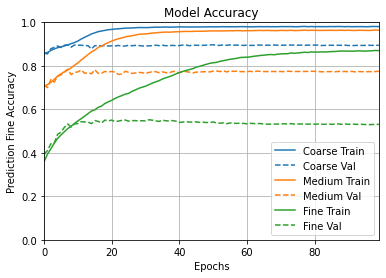

In [19]:
try:
    history_dict = history.history

    plotter = tfdocs.plots.HistoryPlotter()
    plotter.plot({"Coarse": history}, metric = "prediction_coarse_accuracy")
    plotter.plot({"Medium": history}, metric = "prediction_medium_accuracy")
    plotter.plot({"Fine": history}, metric = "prediction_fine_accuracy")
    plt.title("Model Accuracy")
    plt.ylim([0,1])
except:
    print('Trained model weights loaded')

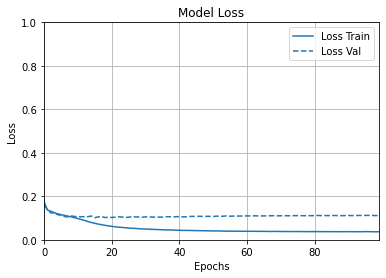

In [20]:
try:
    plotter = tfdocs.plots.HistoryPlotter()
    plotter.plot({"loss": history}, metric = "loss")
    plt.title("Model Loss")
    plt.ylim([0,1])
except:
    print('Trained model weights loaded')

## Model Analysis

In [21]:
final_model = keras.Model(model.inputs[:1], model.output)

lossfn = models.MarginLoss()
final_model.compile(optimizer='adam', 
                    loss={'prediction_fine' : lossfn,
                          'prediction_medium' : lossfn,
                          'prediction_coarse' : lossfn},

                    loss_weights={'prediction_fine' : lossweight['fine_lw'],
                                  'prediction_medium' : lossweight['medium_lw'],
                                  'prediction_coarse' : lossweight['coarse_lw']},

                    metrics={'prediction_fine': 'accuracy',
                             'prediction_medium': 'accuracy',
                             'prediction_coarse': 'accuracy'
                            }
                   )

In [32]:
results = final_model.evaluate(dataset.test_dataset)
for n in range(len(results)):
    print(str(n+1)+'.',final_model.metrics_names[n], '==>', results[n])
# model_predictions = final_model.predict(dataset.test_dataset)

1675/1675 [==============================] - 62s 37ms/step - loss: 0.2322 - prediction_coarse_loss: 0.0778 - prediction_medium_loss: 0.1769 - prediction_fine_loss: 0.3755 - prediction_coarse_accuracy: 0.8944 - prediction_medium_accuracy: 0.7702 - prediction_fine_accuracy: 0.5257
1. loss ==> 0.23217418789863586
2. prediction_coarse_loss ==> 0.07784893363714218
3. prediction_medium_loss ==> 0.17690837383270264
4. prediction_fine_loss ==> 0.37550804018974304
5. prediction_coarse_accuracy ==> 0.8943578004837036
6. prediction_medium_accuracy ==> 0.7701694369316101
7. prediction_fine_accuracy ==> 0.5257481932640076


In [25]:
def predict_from_pipeline(model, dataset):
    y_pred_c = []
    y_pred_m = []
    y_pred_f = []
    
    y_true_c = []
    y_true_m = []
    y_true_f = []
    for x, y in dataset:
        batch_pred = model.predict(x)
        
        y_true_c.extend(y[0].numpy().tolist())
        y_true_m.extend(y[1].numpy().tolist())
        y_true_f.extend(y[2].numpy().tolist())
        
        y_pred_c.extend(batch_pred[0].tolist())
        y_pred_m.extend(batch_pred[1].tolist())
        y_pred_f.extend(batch_pred[2].tolist())
        
    return np.array(y_true_c), np.array(y_true_m), np.array(y_true_f), np.array(y_pred_c), np.array(y_pred_m), np.array(y_pred_f)

In [29]:
y_true_c, y_true_m, y_true_f, y_pred_c, y_pred_m, y_pred_f = predict_from_pipeline(final_model, dataset.test_dataset)

  • Confusion_Matrix 

  • COARSE LEVEL 
[[22369   711]
 [ 2120  1598]]

  • MEDIUM LEVEL 
[[   37    77     0     0     0     4     2   569     0    54]
 [   27  1020     0     1     1     3     2  1142     0   129]
 [    0     1     0     0     0     0     0    22     0     1]
 [    0     5     0    11     0     0     0    95     0     8]
 [    0     5     0     0     0     2     0    39     0     3]
 [    5    15     0     0     0     3     0   106     0    15]
 [    3     9     0     1     0     0   358   304     1    19]
 [   89   472     0    11     2    23   110 17393     3   859]
 [    0     0     1     0     0     0     0    16     0     2]
 [   32   149     0     7     1     8     7  1697     0  1817]]

  • FINE LEVEL 
[[389  19  12 ...   0  53   4]
 [ 41 169  21 ...   1  17   3]
 [ 29  26  82 ...   0   7   0]
 ...
 [  6  10   3 ...   0   6   0]
 [ 82  19  11 ...   0  64   2]
 [  9   2   1 ...   0   1 204]]

  • Classification Report 


  • COARSE LEVEL 


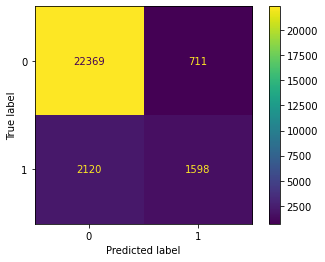

              precision    recall  f1-score   support

           0    0.91343   0.96919   0.94049     23080
           1    0.69207   0.42980   0.53028      3718

    accuracy                        0.89436     26798
   macro avg    0.80275   0.69950   0.73538     26798
weighted avg    0.88272   0.89436   0.88357     26798


  • MEDIUM LEVEL 


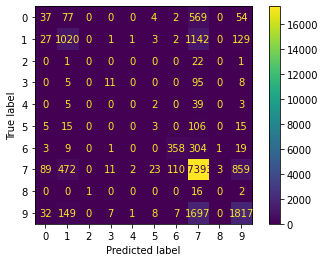

              precision    recall  f1-score   support

           0    0.19171   0.04980   0.07906       743
           1    0.58186   0.43871   0.50025      2325
           2    0.00000   0.00000   0.00000        24
           3    0.35484   0.09244   0.14667       119
           4    0.00000   0.00000   0.00000        49
           5    0.06977   0.02083   0.03209       144
           6    0.74739   0.51511   0.60988       695
           7    0.81340   0.91726   0.86221     18962
           8    0.00000   0.00000   0.00000        19
           9    0.62504   0.48870   0.54853      3718

    accuracy                        0.77017     26798
   macro avg    0.33840   0.25228   0.27787     26798
weighted avg    0.73941   0.77017   0.74843     26798


  • FINE LEVEL 


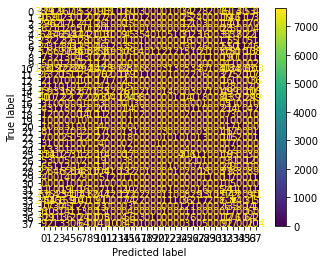

              precision    recall  f1-score   support

           0    0.25178   0.23720   0.24427      1640
           1    0.34420   0.31887   0.33105       530
           2    0.37788   0.26115   0.30885       314
           3    0.09322   0.10377   0.09821       106
           4    0.41184   0.41550   0.41366      1574
           5    0.05882   0.02459   0.03468       244
           6    0.07534   0.03806   0.05057       289
           7    0.27085   0.27544   0.27312      1474
           8    0.04000   0.01042   0.01653        96
           9    0.00000   0.00000   0.00000        30
          10    0.40772   0.44869   0.42723      3294
          11    0.28571   0.14486   0.19225       428
          12    0.14000   0.06604   0.08974       106
          13    0.00000   0.00000   0.00000        31
          14    0.10970   0.04522   0.06404       575
          15    0.55491   0.63354   0.59162      1962
          16    0.23077   0.10345   0.14286        29
          17    0.06667   0

C:\Users\knoor\.conda\envs\py38tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\knoor\.conda\envs\py38tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\knoor\.conda\envs\py38tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
metrics.lvl_wise_metric([y_true_c, y_true_m, y_true_f],
                        [y_pred_c, y_pred_m, y_pred_f])

In [31]:
h_measurements,consistency,exact_match = metrics.hmeasurements([y_true_c, y_true_m, y_true_f],
                                                               [y_pred_c, y_pred_m, y_pred_f],
                                                               dataset.get_tree())
print('\nHierarchical Precision =',h_measurements[0],
      '\nHierarchical Recall =', h_measurements[1],
      '\nHierarchical F1-Score =',h_measurements[2],
      '\nConsistency = ', consistency,
      '\nExact Match = ', exact_match,
     )


Hierarchical Precision = 0.7263520909520611 
Hierarchical Recall = 0.742630047018434 
Hierarchical F1-Score = 0.7329482655066654 
Consistency =  0.9152175535487723 
Exact Match =  0.5035823568923053
